# __Clustering Tweets by Hashtags__

## Data

In [1]:
import pandas as pd

In [2]:
tweets_df = pd.read_parquet('data/tweets/selected_tt_split.parquet')
tweets_df.shape

(1814599, 4)

In [3]:
tweets_df.head()

,author,user_description,tweet,hashtags
0,Indignado72,"“There are no coincidences, only the inevitable”",Cadê a cambada que dizia que era só uma gripez...,[BolsonaroGenocida]
1,EscutaZeNinguem,Mas quando a vida nos violentar\nPediremos ao ...,@seguezaqueu @zaqueusdvPT É porque a PF agora ...,[BolsonaroGenocida]
2,guinody,Só opinião que não vale nada.,@folhape @rbezerrademelo Não haverá segundo tu...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA..."
3,guinody,Só opinião que não vale nada.,@HaddadDebochado Não haverá segundo turno.\nNe...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA..."
4,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]"


In [4]:
def list_2_lower(l: list):
    return [s.lower() for s in l]

In [5]:
tweets_df['hashtags_lowercase'] = tweets_df['hashtags'].map(lambda x: list_2_lower(x))
tweets_df['hashtags_string'] = tweets_df['hashtags_lowercase'].map(lambda x: ' '.join(x))
tweets_df.head()

,author,user_description,tweet,hashtags,hashtags_lowercase,hashtags_string
0,Indignado72,"“There are no coincidences, only the inevitable”",Cadê a cambada que dizia que era só uma gripez...,[BolsonaroGenocida],[bolsonarogenocida],bolsonarogenocida
1,EscutaZeNinguem,Mas quando a vida nos violentar\nPediremos ao ...,@seguezaqueu @zaqueusdvPT É porque a PF agora ...,[BolsonaroGenocida],[bolsonarogenocida],bolsonarogenocida
2,guinody,Só opinião que não vale nada.,@folhape @rbezerrademelo Não haverá segundo tu...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA...","[bolsonarogenocida, lulasociodogenocida, ciroa...",bolsonarogenocida lulasociodogenocida ciroavisou
3,guinody,Só opinião que não vale nada.,@HaddadDebochado Não haverá segundo turno.\nNe...,"[BolsonaroGenocida, LulaSocioDoGenocida, CiroA...","[bolsonarogenocida, lulasociodogenocida, ciroa...",bolsonarogenocida lulasociodogenocida ciroavisou
4,Sandroka131,“O Brasil que come não conhece o Brasil que te...,@zehdeabreu @verabr1 Mais de 100 pedidos de im...,"[CPIdaCovid, GenocidaDesgracado]","[cpidacovid, genocidadesgracado]",cpidacovid genocidadesgracado


## Clustering: TF-IDF + KMeans

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
vec = TfidfVectorizer()
vec.fit(tweets_df['hashtags_string'])
features = vec.transform(tweets_df['hashtags_string'])
features.shape

(1814599, 74368)

In [8]:
sum_of_squared_distances = []
for k in range(2,11):
   print('Clustering K = ', k)
   km = KMeans(n_clusters=k)
   km.fit(features)
   sum_of_squared_distances.append(km.inertia_)

Clustering K =  2
Clustering K =  3
Clustering K =  4
Clustering K =  5
Clustering K =  6
Clustering K =  7
Clustering K =  8
Clustering K =  9
Clustering K =  10


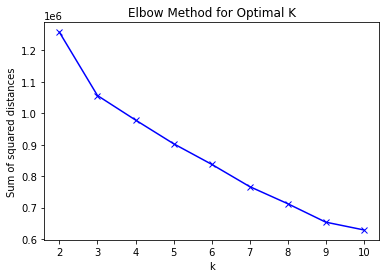

In [9]:
plt.plot(range(2,11), sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method for Optimal K')
plt.show()

In [10]:
true_k = 3
model = KMeans(n_clusters=true_k)
model.fit(features)
labels = model.labels_

s_counts = pd.Series(labels).value_counts()
s_perc = pd.Series(labels).value_counts(normalize=True).values
for idx, val, perc in zip(s_counts.index, s_counts.values, s_perc):
    print(f'Cluster {idx}: {val} ({perc*100:.2f}%)')

Cluster 0: 1105610 (60.93%)
Cluster 1: 427286 (23.55%)
Cluster 2: 281703 (15.52%)


In [11]:
result = pd.DataFrame({'user': tweets_df['author'], 'tweet': tweets_df['tweet'], 'hashtags':tweets_df['hashtags_lowercase'], 'hashtag_str': tweets_df['hashtags_string'],'cluster':labels})

In [12]:
result.query('cluster == 0').sample(20)

,user,tweet,hashtags,hashtag_str,cluster
1394735,ptribeirao,Vacina da UFRJ é eficaz contra variante delta ...,"[forabolsonaro, lulalivrebrasillivre]",forabolsonaro lulalivrebrasillivre,0
787497,TaxiZapElite,"Uma singela homenagem a #CPIdaPandemia , seu r...","[cpidapandemia, fechadocombolsonaro2022, witze...",cpidapandemia fechadocombolsonaro2022 witzelve...,0
1126802,naomexecmg,"gente, namoral:\n\nSE NÃO FOSSE TEBET E A BANC...",[cpidapandemia],cpidapandemia,0
597480,jandira1910,@o_antagonista É o mundo perfeito do Bolsolixo...,"[forabolsonaroeseubandodecriminosos, forabolso...",forabolsonaroeseubandodecriminosos forabolsonaro,0
1631788,vanets,É irritante demais ver esse diretor da Prevent...,[cpidapandemia],cpidapandemia,0
1256952,Margabacher,@DCM_online A única vez que o Bozo foi ao hosp...,[forabolsonarogenocida],forabolsonarogenocida,0
648519,PepperDane1,@CarlosBolsonaro Carlos Lixo da #FAMILICIA Do ...,"[familicia, forabolsonaro, cpidacovid]",familicia forabolsonaro cpidacovid,0
741988,AdelaideFeli,@MarcuseJe @_rosy_38 @BiaScherre @marciogomesr...,"[contagempúblicadosvotos, cpidocirco]",contagempúblicadosvotos cpidocirco,0
1335843,PPicarelli,Hj tô um tanto revoltada com o Brasil #Brasil ...,"[brasil, cpidacovid]",brasil cpidacovid,0
1279981,eduardozda,OLHA ELAAAAA VACINADAAAAH #VacinaSim #ForaBols...,"[vacinasim, forabolsonaro]",vacinasim forabolsonaro,0


In [13]:
result.query('cluster == 1').sample(20)

,user,tweet,hashtags,hashtag_str,cluster
1346633,comunistaexaust,Rogério LENDO as conversas 🗣🗣🗣🗣🗣#CPIdaCovid,[cpidacovid],cpidacovid,1
1058239,babeesticx,O wizard hoje #CPIdaCovid https://t.co/bQDW56sTO5,[cpidacovid],cpidacovid,1
169668,JumiorCoisa,matam um monte de gente sem provas mas não pre...,[cpidacovid],cpidacovid,1
650924,EduardaItsMe,É mais fácil falar: a favor levanta a mão! Mét...,[cpidacovid],cpidacovid,1
1254004,luciah1000,Impressão minha ou na #CPIdaCovid ficou demons...,[cpidacovid],cpidacovid,1
307057,tiaprinotwiter,"Lá vem o baba ovo\nQuem?\nEste mesmo, Fernando...",[cpidacovid],cpidacovid,1
813365,misabelmelo1,Eu me pergunto se não existe senador decente ...,[cpidacovid],cpidacovid,1
1132804,PinkMatter55,Quanto será que ganha? Pq aparentemente ela nã...,[cpidacovid],cpidacovid,1
341760,moonysbee,"peça desculpas ao povo brasileiro, pazuello #C...",[cpidacovid],cpidacovid,1
1138167,thanobre,"O Dias deve ter bebido é cachaça pura nesse ""c...",[cpidacovid],cpidacovid,1


In [14]:
result.query('cluster == 2').sample(20)

,user,tweet,hashtags,hashtag_str,cluster
773496,lrochal62,@pretaferreira @GuilhermeBoulos Parabéns @Guil...,[forabolsonaro],forabolsonaro,2
1407323,BauleriCris,@heimo37 @JotaInfo Lugar de ladrão é na cade...,[forabolsonaro],forabolsonaro,2
1513138,helosinhaz,Esse é o Brasil de um dos piores presidentes q...,[forabolsonaro],forabolsonaro,2
1258921,ClauSousaJr,@msoares Eu não tenho mais paciência nem comig...,[forabolsonaro],forabolsonaro,2
1175026,Linnostv,"""ACHA""?!? Kakaka...Temos essa certeza a tempos...","[forabolsonaro, cpidacovid]",forabolsonaro cpidacovid,2
1576287,ACBraga2012,Os caminhoneiros não estão nisso!\n\nSão manip...,[forabolsonaro],forabolsonaro,2
793191,marcellonitter,@juliette minhas mamães vão acabar com esse co...,[forabolsonaro],forabolsonaro,2
1461824,deabmorgana,"Bom dia só pra quem odeia esse despresidente, ...",[forabolsonaro],forabolsonaro,2
761638,hugobbezerra,#ForaBolsonaro e seu bando de criminosos https...,[forabolsonaro],forabolsonaro,2
1553591,guimaraes13PT,FOI GIGANTE!\nFortaleza/CE não precisou de ôni...,[forabolsonaro],forabolsonaro,2


Cluster :  0


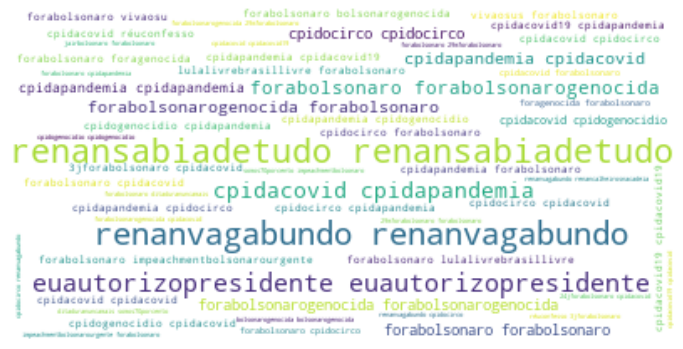

Cluster :  1


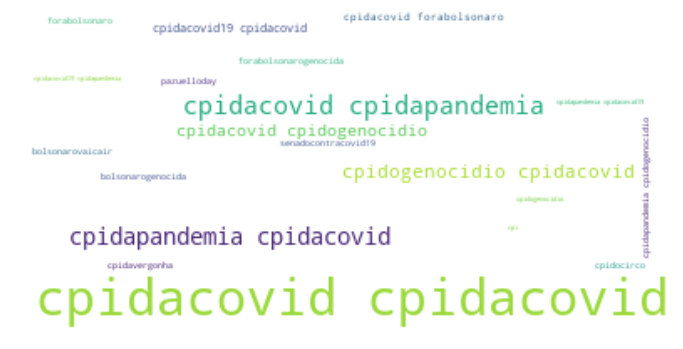

Cluster :  2


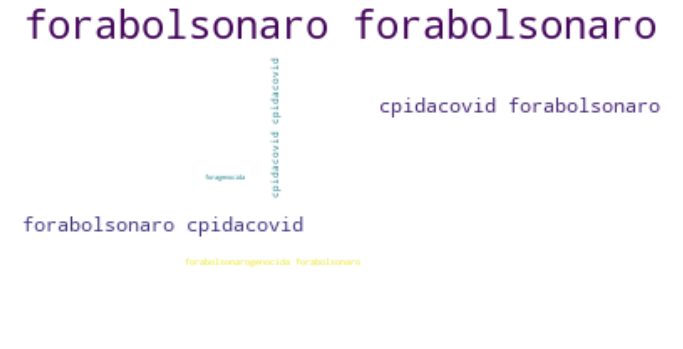

In [15]:
from wordcloud import WordCloud

for k in range(0, true_k):
    s = result[result['cluster']==k]
    text = s['hashtag_str'].str.cat(sep=' ')
    text = text.lower()
    text = ' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(text)
    print('Cluster : ', k)
    plt.figure(figsize=(12,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [16]:
for x in range(0, true_k):
    cluster_data = result[result['cluster']==x]
    hashtags_ = []
    for h_list in cluster_data['hashtags']:
        for ht in h_list:
            hashtags_.append(ht)
    s_counts_ = pd.Series(hashtags_).value_counts()[:20]
    s_perc_ = pd.Series(hashtags_).value_counts(normalize=True)[:20]
    print(f'\nCluster {x} top 20 hashtags:\n')
    for idx, val, perc in zip(s_counts_.index, s_counts_.values, s_perc_.values):
        print(f'#{idx}: {val} ({perc*100:.3f}%)')


Cluster 0 top 20 hashtags:

#forabolsonaro: 306260 (12.060%)
#cpidacovid: 173787 (6.844%)
#forabolsonarogenocida: 149987 (5.906%)
#cpidapandemia: 142421 (5.608%)
#renanvagabundo: 115318 (4.541%)
#cpidocirco: 111292 (4.383%)
#renansabiadetudo: 87883 (3.461%)
#euautorizopresidente: 78396 (3.087%)
#bolsonarogenocida: 56972 (2.244%)
#cpidogenocidio: 50257 (1.979%)
#covid19: 42896 (1.689%)
#cpidacovid19: 40921 (1.611%)
#vivaosus: 26142 (1.029%)
#impeachmentbolsonarourgente: 23125 (0.911%)
#29mforabolsonaro: 18819 (0.741%)
#foragenocida: 17926 (0.706%)
#3jforabolsonaro: 15319 (0.603%)
#lulalivrebrasillivre: 14296 (0.563%)
#bolsonaronacadeia: 12831 (0.505%)
#cpidavergonha: 12602 (0.496%)

Cluster 1 top 20 hashtags:

#cpidacovid: 428099 (99.939%)
#cpidapandemia: 96 (0.022%)
#cpidogenocidio: 51 (0.012%)
#cpidacovid19: 23 (0.005%)
#forabolsonaro: 19 (0.004%)
#cpidocirco: 8 (0.002%)
#forabolsonarogenocida: 8 (0.002%)
#senadocontracovid19: 7 (0.002%)
#cpidavergonha: 7 (0.002%)
#bolsonarogenocida:

## Agglomerative Clustering

In [20]:
del result

In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer

In [19]:
pipeline = make_pipeline(
    TfidfVectorizer(stop_words='english'),
    FunctionTransformer(lambda x: x.todense(), accept_sparse=True),
    AgglomerativeClustering(linkage='average')  # Use average linkage
)

In [21]:
pipeline = pipeline.fit(tweets_df['hashtags_string'])

MemoryError: Unable to allocate 1005. GiB for an array with shape (1814599, 74325) and data type float64